BOX 1: reading packages

In [66]:
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, chisquare
import statsmodels.formula.api as sfm
from scipy import stats


BOX 2 reading the csv + checking each column for null values

In [36]:
df = pd.read_csv('udemy_database.csv')
has_nulls = df.isnull().any()
print(has_nulls)

course_id              False
course_title           False
url                    False
is_paid                False
price                  False
num_subscribers        False
num_reviews            False
num_lectures           False
level                  False
content_duration       False
published_timestamp    False
subject                False
dtype: bool


BOX 3 checking for duplicates - there where 6 duplicates

In [53]:
course_counts = df['course_id'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

df.drop_duplicates(subset='course_id', inplace=True)


Series([], Name: count, dtype: int64)


BOX 4: detecting outliers
method: https://bpb-us-w2.wpmucdn.com/sites.umassd.edu/dist/f/1316/files/2023/01/Statistics-for-Nursing-and-Allied-Health-PDFDrive-.pdf#page=34
Column: course_id, Outliers Count: 0
Column: price, Outliers Count: 0
Column: num_subscribers, Outliers Count: 48
Column: num_reviews, Outliers Count: 27
Column: num_lectures, Outliers Count: 73
Column: content_duration, Outliers Count: 69

In [38]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    mean = df[column].mean()
    std_dev = df[column].std()

    outliers = df[(df[column] < (mean - 3 * std_dev)) | (df[column] > (mean + 3 * std_dev))]

    outliers_dict[column] = outliers
    outliers_count = len(outliers)
    
    print(f"Column: {column}, Outliers Count: {outliers_count}")
    # print(outliers, "\n")


Column: course_id, Outliers Count: 0
Column: price, Outliers Count: 0
Column: num_subscribers, Outliers Count: 48
Column: num_reviews, Outliers Count: 27
Column: num_lectures, Outliers Count: 73
Column: content_duration, Outliers Count: 69


BOX 4: the outliers intersection based on numeric variables

In [39]:
common_outliers_pairwise = {}

for col1, col2 in combinations(outliers_dict.keys(), 2):
    outliers_col1 = set(outliers_dict[col1]['course_id']) if isinstance(outliers_dict[col1], pd.DataFrame) else set(outliers_dict[col1])
    outliers_col2 = set(outliers_dict[col2]['course_id']) if isinstance(outliers_dict[col2], pd.DataFrame) else set(outliers_dict[col2])

    common_outliers = outliers_col1.intersection(outliers_col2)

    common_outliers_pairwise[f"{col1} & {col2}"] = common_outliers

for columns, common_outliers in common_outliers_pairwise.items():
    print(f"Common outliers for {columns}:", len(common_outliers))
    for course_id in common_outliers:
        print(f"  - Course ID {course_id}")
    print()



Common outliers for course_id & price: 0

Common outliers for course_id & num_subscribers: 0

Common outliers for course_id & num_reviews: 0

Common outliers for course_id & num_lectures: 0

Common outliers for course_id & content_duration: 0

Common outliers for price & num_subscribers: 0

Common outliers for price & num_reviews: 0

Common outliers for price & num_lectures: 0

Common outliers for price & content_duration: 0

Common outliers for num_subscribers & num_reviews: 20
  - Course ID 764164
  - Course ID 364426
  - Course ID 130064
  - Course ID 519442
  - Course ID 437398
  - Course ID 719002
  - Course ID 405926
  - Course ID 625204
  - Course ID 756150
  - Course ID 446134
  - Course ID 473160
  - Course ID 48841
  - Course ID 289230
  - Course ID 41295
  - Course ID 238934
  - Course ID 314462
  - Course ID 461160
  - Course ID 173548
  - Course ID 705264
  - Course ID 707962

Common outliers for num_subscribers & num_lectures: 10
  - Course ID 764164
  - Course ID 11174
 

BOX 6: plotting the data to better see the outliers

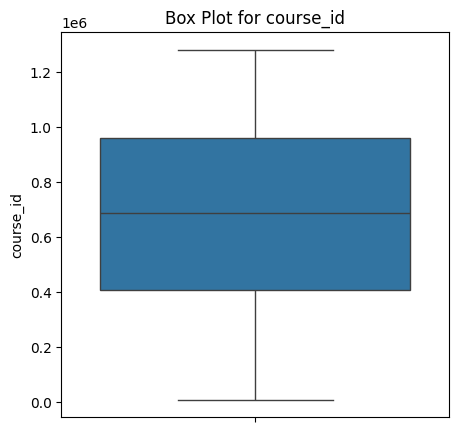

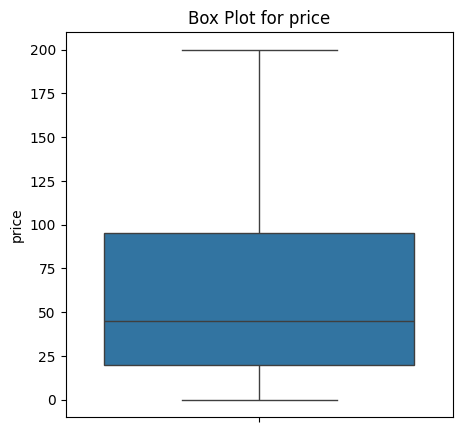

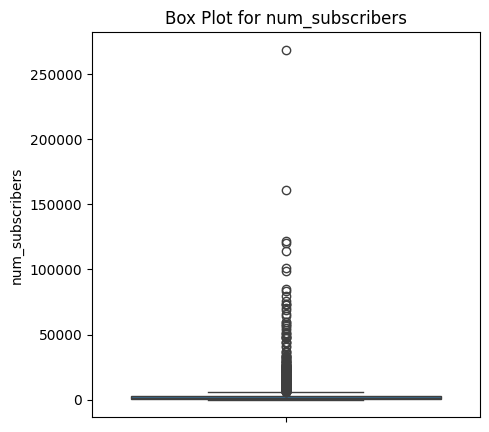

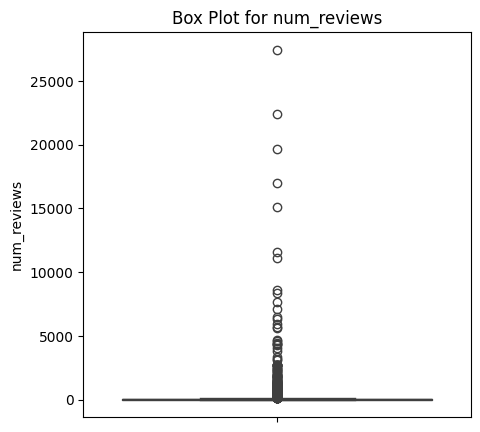

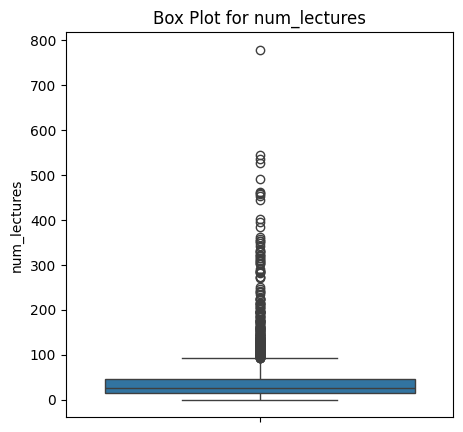

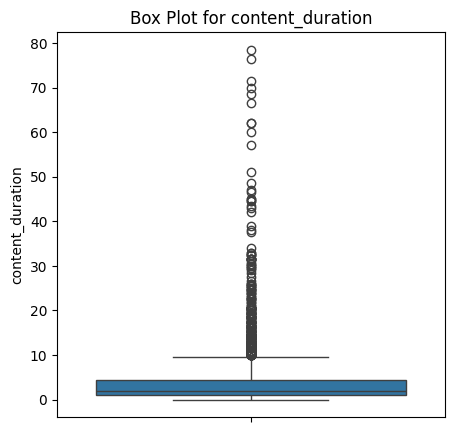

In [40]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

BOX 7 Perform a Chi-Square Test for Goodness of Fit on observed categorical counts.

In [41]:
def chi_square_test(observed_values, alpha=0.05):

    expected_counts = [sum(observed_values) / len(observed_values)] * len(observed_values)

    chi2_stat, p_value = chisquare(f_obs=observed_values, f_exp=expected_counts)

    result = "reject the null hypothesis" if p_value < alpha else "fail to reject the null hypothesis"
    
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")

    # print(f"Observed Values: {observed_values}")
    # print(f"Expected Values: {expected_counts}")
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")
    
    return {
        f"Chi-Square Statistic: {chi2_stat}",
        f"P-Value: {p_value}",
        f"Result: {result}"
    }

In [42]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    mean = df[column].mean()
    std_dev = df[column].std()

    outliers = df[(df[column] < (mean - 3 * std_dev)) | (df[column] > (mean + 3 * std_dev))]

    outliers_dict[column] = outliers
    outliers_count = len(outliers)
    
    print(f"Column: {column}, Outliers Count: {outliers_count}")
    # print(outliers, "\n")


Column: course_id, Outliers Count: 0
Column: price, Outliers Count: 0
Column: num_subscribers, Outliers Count: 48
Column: num_reviews, Outliers Count: 27
Column: num_lectures, Outliers Count: 73
Column: content_duration, Outliers Count: 69


BOX 8 BARCHART: count all the courses taking into account the subject

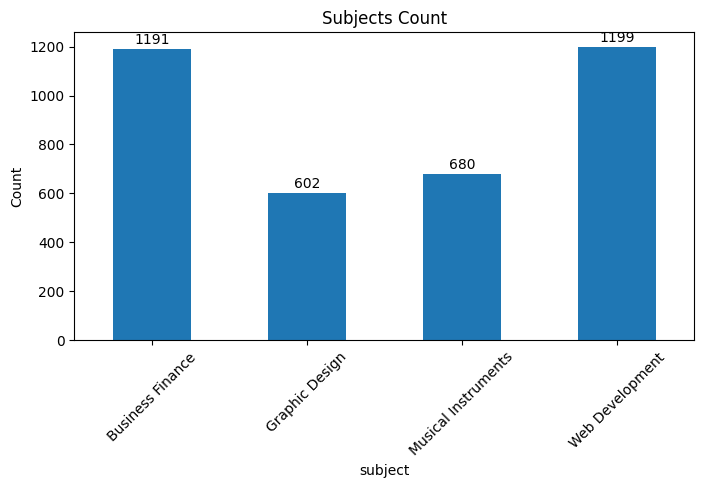

In [43]:
category = df.groupby('subject')['subject'].count()

plt.figure(figsize=(8, 4))
for i, v in enumerate(category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
category.plot(kind='bar')
plt.title('Subjects Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

BOX 9: Chi square for courses based on subj
H₀: There is no statistical difference in the number of couses per subject
H₁: There is a statistical difference in the number of couses per subject for at least one subject

In [ ]:
observed_cat = category.values  
chi_square_test(observed_cat)

{'Chi-Square Statistic: 337.67973856209153',
 'P-Value: 6.938242224702548e-73',
 'Result: reject the null hypothesis'}

BOX 10 BARCHART: avg duration per subject

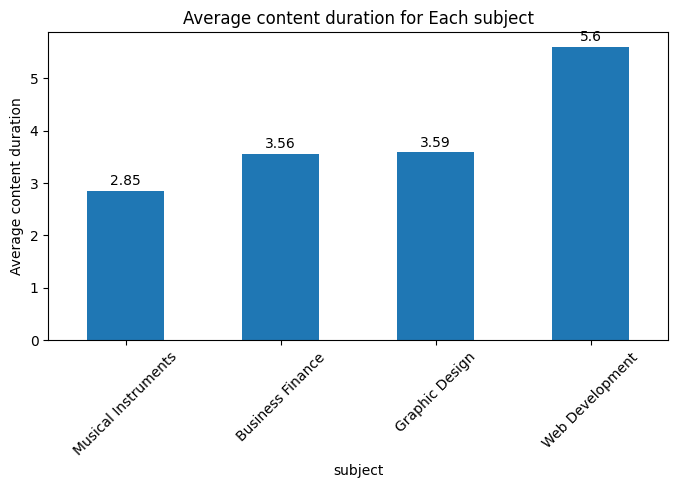

In [56]:
avg_duration_subj = df.groupby('subject')['content_duration'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration_subj.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_duration_subj.plot(kind='bar')
plt.title('Average content duration for Each subject')
plt.xlabel('subject')
plt.ylabel('Average content duration')
plt.xticks(rotation=45)
plt.show()

BOX 11 Chi Square for avr duration based on each subject
H₀: all subjects have a similar value for the avg duration 
H₁: at least one subject has a different value for the avg duration

In [58]:
observed_avg_duration = avg_duration_subj.values
chi_square_test(observed_avg_duration)

{'Chi-Square Statistic: 1.0738276876778154',
 'P-Value: 0.7833956419700129',
 'Result: fail to reject the null hypothesis'}

BOX 12 BARCHART: total number of subscribers enrolled for each subject

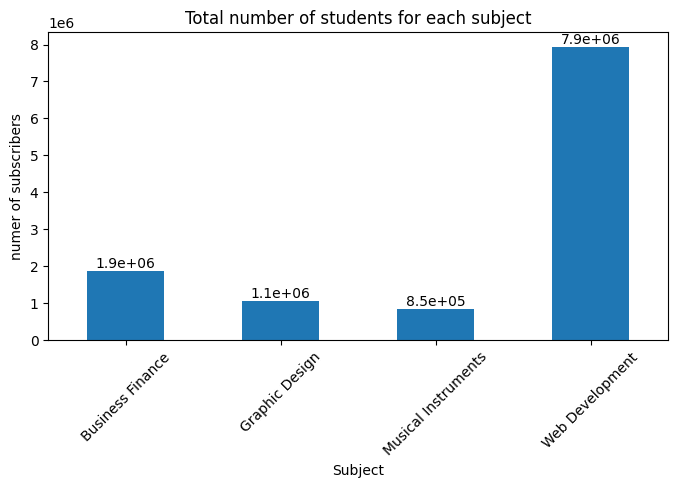

In [45]:
total_enrolled_stud = df.groupby('subject')['num_subscribers'].sum()

plt.figure(figsize=(8, 4))

for i, v in enumerate(total_enrolled_stud.values):
    scientific_notation = "{:.1e}".format(v) 
    plt.text(i, v + v * 0.001, scientific_notation, ha='center', va='bottom')

total_enrolled_stud.plot(kind='bar')
plt.title('Total number of students for each subject')
plt.xlabel('Subject')
plt.ylabel('numer of subscribers')
plt.xticks(rotation=45)
plt.show()

BOX 13 Chi Square for total number of subscribers enrolled in each subject
H₀: all subjects have a similar number of students enrolled
H₁: at least one subject has a different number of students enrolled

In [59]:
observed_avg_subscribers = total_enrolled_stud.values
chi_square_test(observed_avg_subscribers)

{'Chi-Square Statistic: 30658.86730893178',
 'P-Value: 0.0',
 'Result: reject the null hypothesis'}

BOX 14 BARCHART: total number of reviews for each subject

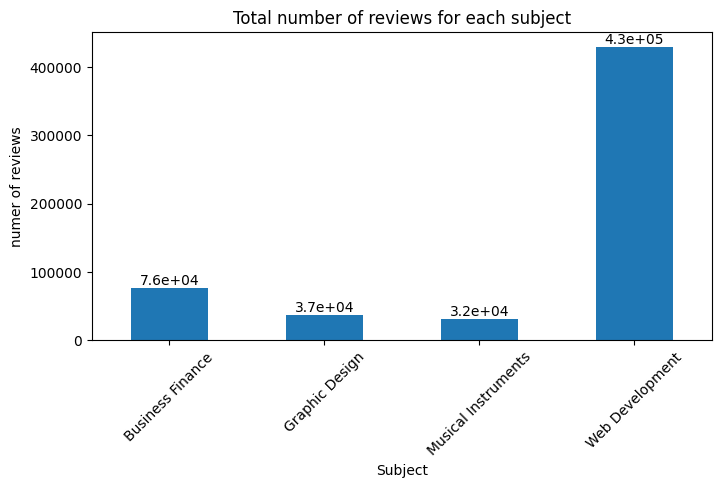

In [60]:
total_reviews = df.groupby('subject')['num_reviews'].sum()

plt.figure(figsize=(8, 4))

for i, v in enumerate(total_reviews.values):
    scientific_notation = "{:.1e}".format(v) 
    plt.text(i, v + v * 0.001, scientific_notation, ha='center', va='bottom')

total_reviews.plot(kind='bar')
plt.title('Total number of reviews for each subject')
plt.xlabel('Subject')
plt.ylabel('numer of reviews')
plt.xticks(rotation=45)
plt.show()

BOX 15: Chi Square test for total number of reviews
H0: The is no significant difference in the number of reviews across all subjects
H1: At least one subject has a different number of reviews that others

In [61]:
observed_total_reviews = total_reviews.values
chi_square_test(observed_total_reviews)

{'Chi-Square Statistic: 767589.4577879331',
 'P-Value: 0.0',
 'Result: reject the null hypothesis'}

BOX 16 BARCHART: total number of professors for each subject

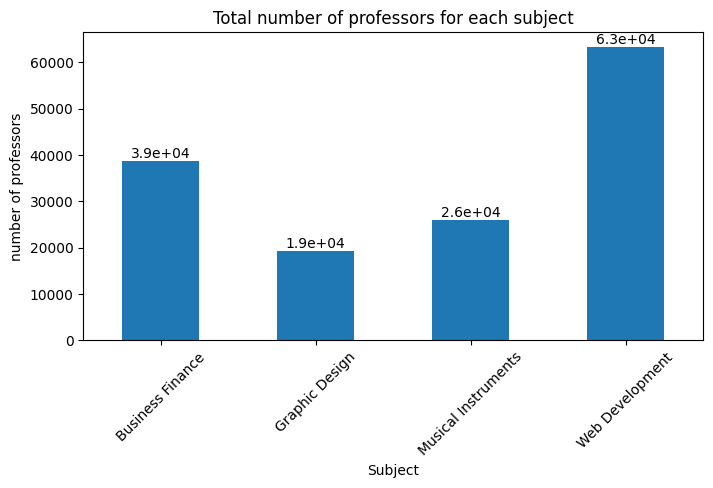

In [63]:
total_professors = df.groupby('subject')['num_lectures'].sum()

plt.figure(figsize=(8, 4))

for i, v in enumerate(total_professors.values):
    scientific_notation = "{:.1e}".format(v) 
    plt.text(i, v + v * 0.001, scientific_notation, ha='center', va='bottom')

total_professors.plot(kind='bar')
plt.title('Total number of professors for each subject')
plt.xlabel('Subject')
plt.ylabel('number of professors')
plt.xticks(rotation=45)
plt.show()

BOX 17: Chi Square for number of professors
H0: There is no statistical difference between the number of professors per subject
H1: At last one subject has a different number of professors than the others

In [ ]:
observed_total_professors= total_professors.values
chi_square_test(observed_total_professors)

{'Chi-Square Statistic: 30658.86730893178',
 'P-Value: 0.0',
 'Result: reject the null hypothesis'}

BOX 18 BARCHART: avg prices for each subject

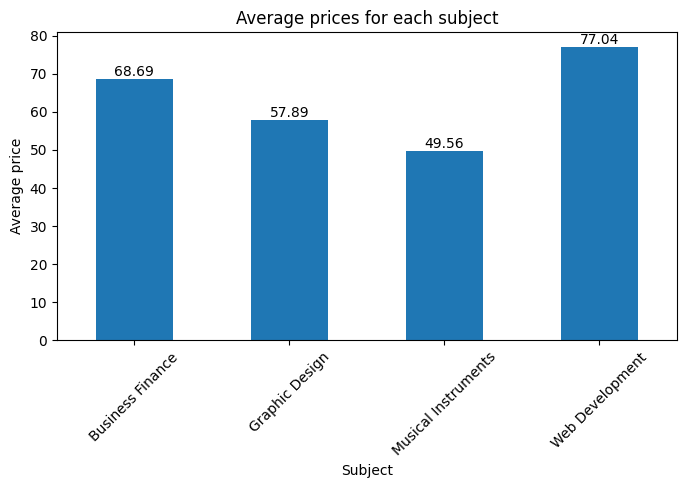

In [48]:
avg_price = df.groupby('subject')['price'].mean()

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_price.values):
    plt.text(i, round(v,2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_price.plot(kind='bar')
plt.title('Average prices for each subject')
plt.xlabel('Subject')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.show()

BOX 19: Chi Square test for avg prices per subject
H0: There is no statistical difference between the avg price per subject
H1: At last one subject has a different agv price than the others

In [65]:
observed_avg_price = avg_price.values
chi_square_test(observed_avg_price)

{'Chi-Square Statistic: 6.88579963278157',
 'P-Value: 0.07562818840722958',
 'Result: fail to reject the null hypothesis'}

BOX 20: Checking distribution for price

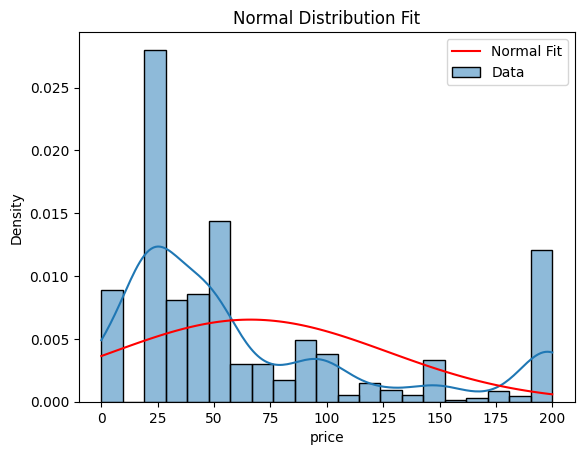

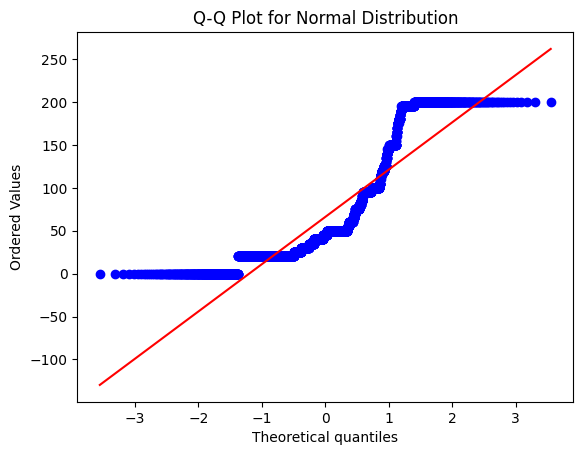

Shapiro-Wilk Test: Stat=0.8125917569824538, p=2.8372585758096045e-54
Data does not follow a normal distribution.


In [67]:
prices = df['price']

sns.histplot(prices, kde=True, stat='density', label='Data')
mean, std = prices.mean(), prices.std()
x = np.linspace(prices.min(), prices.max(), 100)
plt.plot(x, stats.norm.pdf(x, mean, std), label='Normal Fit', color='red')
plt.title('Normal Distribution Fit')
plt.legend()
plt.show()

stats.probplot(prices, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normal Distribution')
plt.show()

stat, p = stats.shapiro(prices)
print(f'Shapiro-Wilk Test: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")


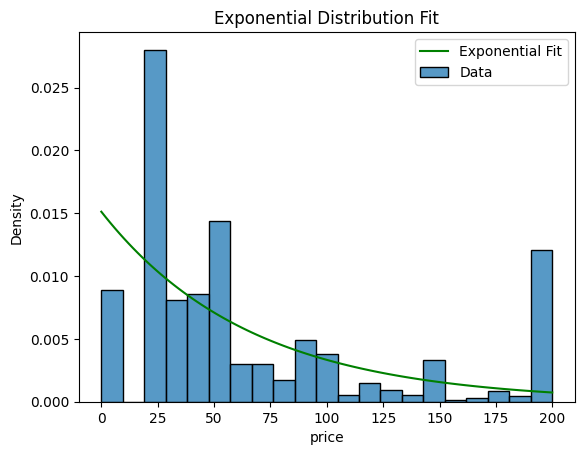

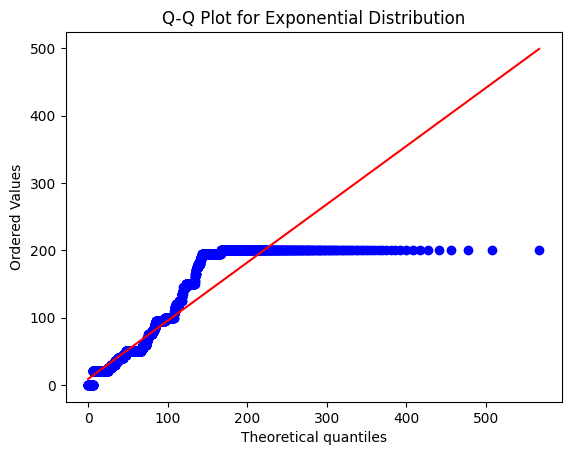

KS Test for Exponential: Stat=0.17665200697347044, p=1.0556852666370218e-100
Data does not follow an exponential distribution.


In [68]:
params = stats.expon.fit(prices)  
sns.histplot(prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.expon.pdf(x, *params), label='Exponential Fit', color='green')
plt.title('Exponential Distribution Fit')
plt.legend()
plt.show()

stats.probplot(prices, dist="expon", sparams=params, plot=plt)
plt.title('Q-Q Plot for Exponential Distribution')
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(prices, 'expon', args=params)
print(f'KS Test for Exponential: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows an exponential distribution.")
else:
    print("Data does not follow an exponential distribution.")

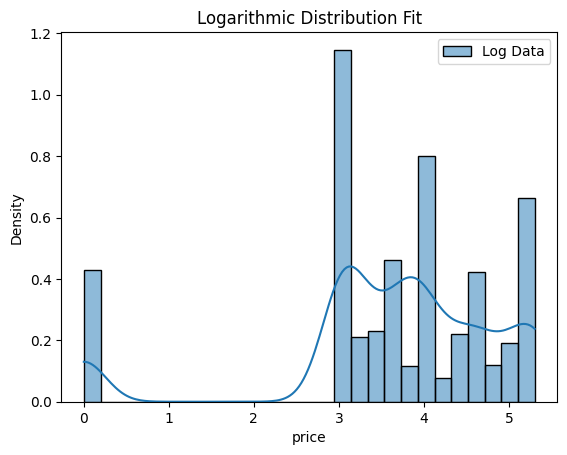

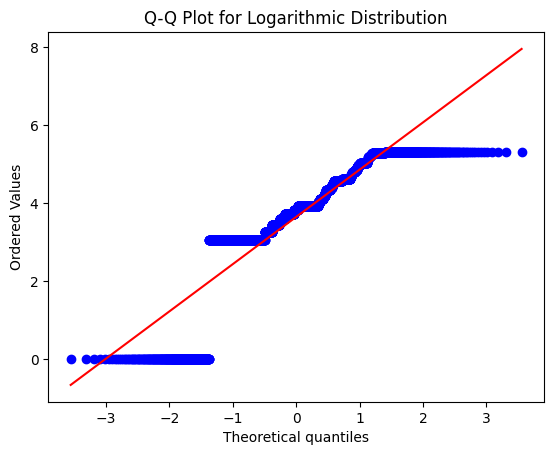

Shapiro-Wilk Test on Log Transformed Data: Stat=0.8219144594263105, p=2.204738120982711e-53
Log-transformed data does not follow a normal distribution.


In [69]:
log_prices = np.log1p(prices)  # log(1+x) to handle zeros
sns.histplot(log_prices, kde=True, stat='density', label='Log Data')
plt.title('Logarithmic Distribution Fit')
plt.legend()
plt.show()

# Q-Q Plot
stats.probplot(log_prices, dist="norm", plot=plt)
plt.title('Q-Q Plot for Logarithmic Distribution')
plt.show()

# Shapiro-Wilk Test
stat, p = stats.shapiro(log_prices)
print(f'Shapiro-Wilk Test on Log Transformed Data: Stat={stat}, p={p}')
if p > 0.05:
    print("Log-transformed data follows a normal distribution.")
else:
    print("Log-transformed data does not follow a normal distribution.")

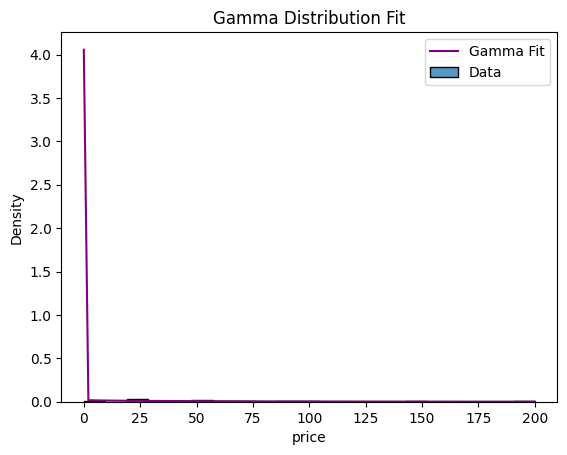

KS Test for Gamma: Stat=0.20352134803331595, p=7.860537442284196e-134
Data does not follow a gamma distribution.


In [70]:
# Fit Gamma Distribution
params = stats.gamma.fit(prices)
sns.histplot(prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.gamma.pdf(x, *params), label='Gamma Fit', color='purple')
plt.title('Gamma Distribution Fit')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(prices, 'gamma', args=params)
print(f'KS Test for Gamma: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a gamma distribution.")
else:
    print("Data does not follow a gamma distribution.")


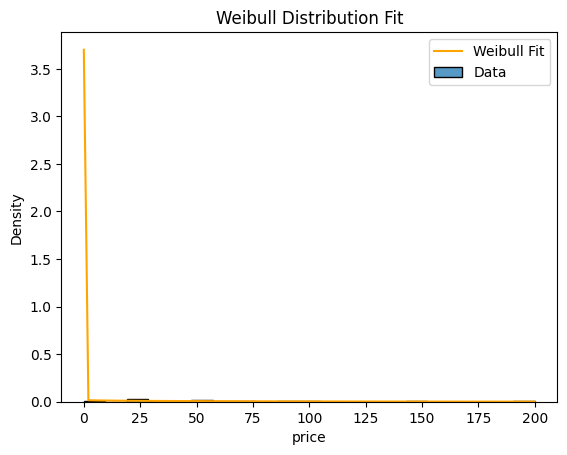

KS Test for Weibull: Stat=0.17336139673054823, p=5.610972186356587e-97
Data does not follow a Weibull distribution.


In [71]:
# Fit Weibull Distribution
params = stats.weibull_min.fit(prices)
sns.histplot(prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.weibull_min.pdf(x, *params), label='Weibull Fit', color='orange')
plt.title('Weibull Distribution Fit')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(prices, 'weibull_min', args=params)
print(f'KS Test for Weibull: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a Weibull distribution.")
else:
    print("Data does not follow a Weibull distribution.")


c:\users\teodo\appdata\local\activestate\cache\f496fb7e\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


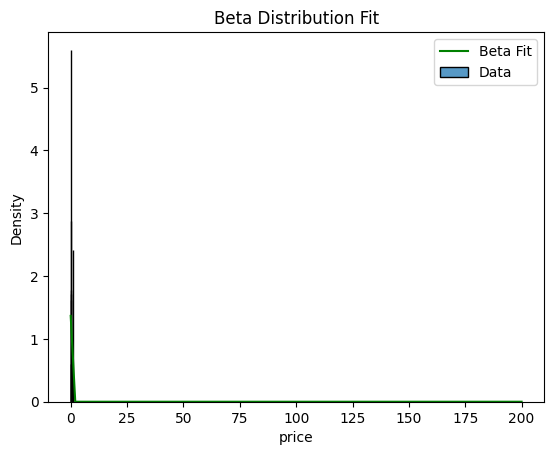

KS Test for Beta: Stat=0.24672039489537784, p=2.3974492318180604e-197
Data does not follow a beta distribution.


In [72]:
# Normalize data to fit [0, 1]
normalized_prices = (prices - prices.min()) / (prices.max() - prices.min())

# Fit Beta Distribution
params = stats.beta.fit(normalized_prices)
sns.histplot(normalized_prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.beta.pdf(x, *params), label='Beta Fit', color='green')
plt.title('Beta Distribution Fit')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(normalized_prices, 'beta', args=params)
print(f'KS Test for Beta: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a beta distribution.")
else:
    print("Data does not follow a beta distribution.")


c:\users\teodo\appdata\local\activestate\cache\f496fb7e\lib\site-packages\scipy\stats\_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\users\teodo\appdata\local\activestate\cache\f496fb7e\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\teodo\appdata\local\activestate\cache\f496fb7e\lib\site-packages\scipy\stats\_distn_infrastructure.py:2036: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


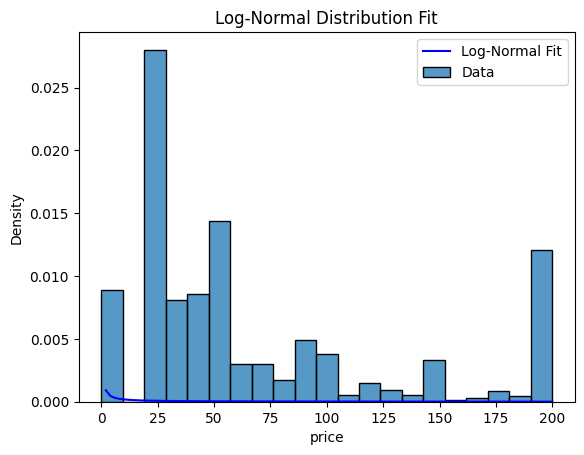

KS Test for Log-Normal: Stat=0.5331234065411202, p=0.0
Data does not follow a log-normal distribution.


In [73]:
# Fit Log-Normal Distribution
params = stats.lognorm.fit(prices)
sns.histplot(prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.lognorm.pdf(x, *params), label='Log-Normal Fit', color='blue')
plt.title('Log-Normal Distribution Fit')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(prices, 'lognorm', args=params)
print(f'KS Test for Log-Normal: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a log-normal distribution.")
else:
    print("Data does not follow a log-normal distribution.")


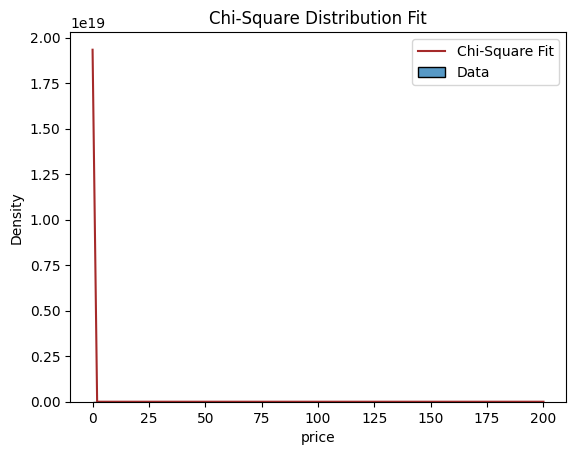

KS Test for Chi-Square: Stat=0.8921668048619243, p=0.0
Data does not follow a chi-square distribution.


In [74]:
# Fit Chi-Square Distribution
params = stats.chi2.fit(prices)
sns.histplot(prices, kde=False, stat='density', label='Data')
plt.plot(x, stats.chi2.pdf(x, *params), label='Chi-Square Fit', color='brown')
plt.title('Chi-Square Distribution Fit')
plt.legend()
plt.show()

# Kolmogorov-Smirnov Test
stat, p = stats.kstest(prices, 'chi2', args=params)
print(f'KS Test for Chi-Square: Stat={stat}, p={p}')
if p > 0.05:
    print("Data follows a chi-square distribution.")
else:
    print("Data does not follow a chi-square distribution.")


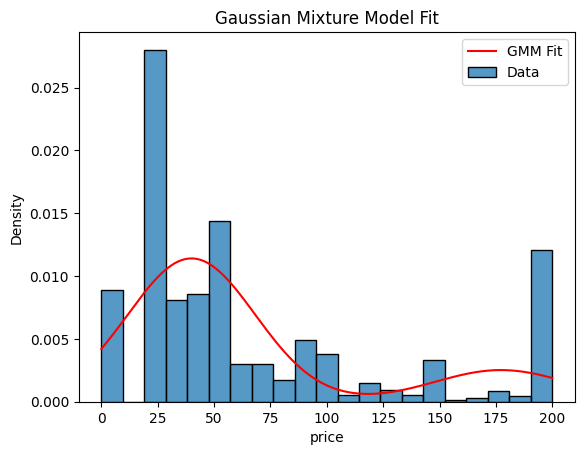

In [75]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)  # Adjust n_components as needed
gmm.fit(prices.values.reshape(-1, 1))
sns.histplot(prices, kde=False, stat="density", label="Data")
x = np.linspace(prices.min(), prices.max(), 1000).reshape(-1, 1)
pdf = np.exp(gmm.score_samples(x))
plt.plot(x, pdf, label="GMM Fit", color="red")
plt.title("Gaussian Mixture Model Fit")
plt.legend()
plt.show()


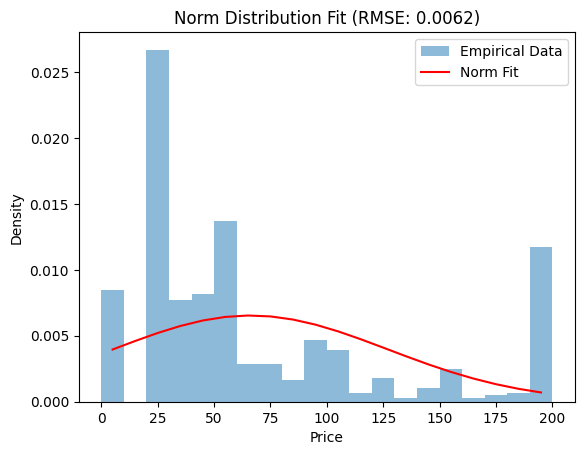

RMSE for Norm distribution: 0.0062


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Empirical data (price)
data = prices

# Histogram for empirical density
counts, bin_edges = np.histogram(data, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit a distribution (e.g., Normal)
dist_name = 'norm'  # Change to other distributions like 'expon', 'gamma'
params = getattr(stats, dist_name).fit(data)
pdf_fitted = getattr(stats, dist_name).pdf(bin_centers, *params)

# Calculate RMSE
rmse = np.sqrt(np.mean((counts - pdf_fitted) ** 2))

# Plot for visualization
plt.hist(data, bins=20, density=True, alpha=0.5, label="Empirical Data")
plt.plot(bin_centers, pdf_fitted, label=f"{dist_name.capitalize()} Fit", color="red")
plt.title(f"{dist_name.capitalize()} Distribution Fit (RMSE: {rmse:.4f})")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"RMSE for {dist_name.capitalize()} distribution: {rmse:.4f}")


BOX 20: checking normal distibutions


Analyzing course_id:


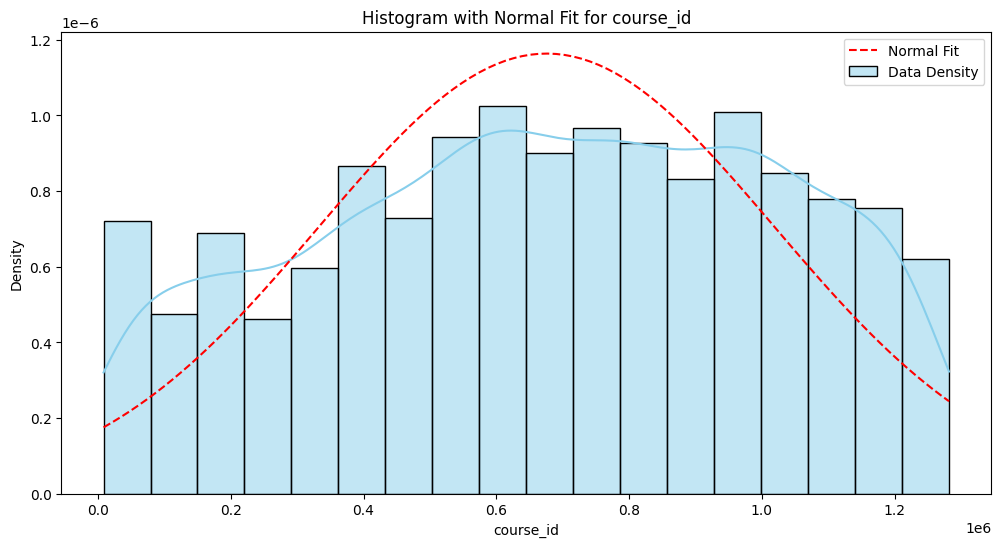

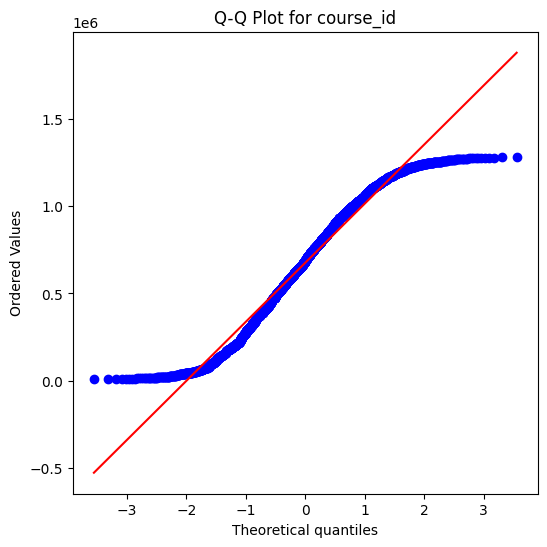

Shapiro-Wilk Test for course_id: Statistic=0.9679, p-value=0.0000
course_id does NOT follow a normal distribution.

Analyzing price:


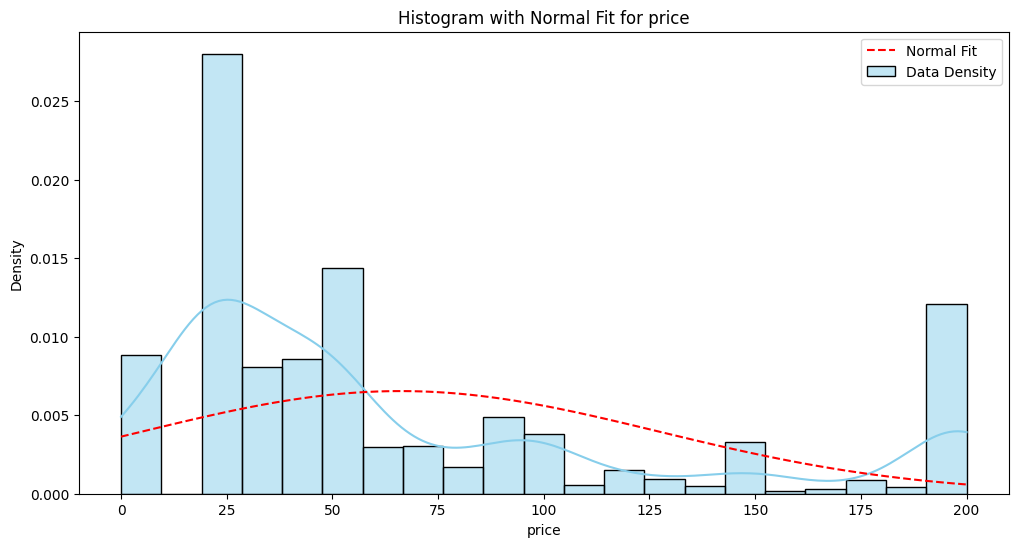

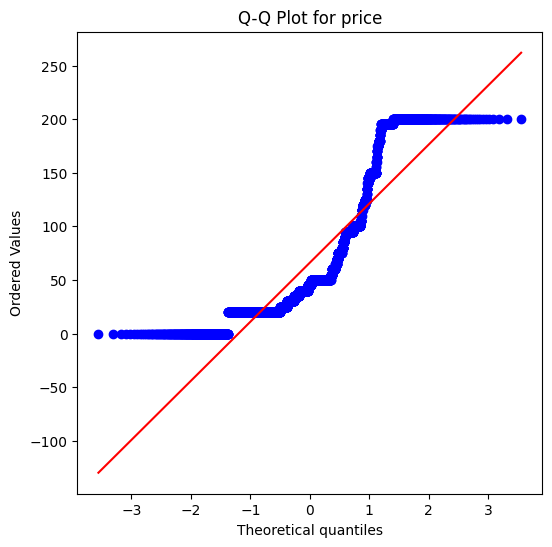

Shapiro-Wilk Test for price: Statistic=0.8126, p-value=0.0000
price does NOT follow a normal distribution.

Analyzing num_subscribers:


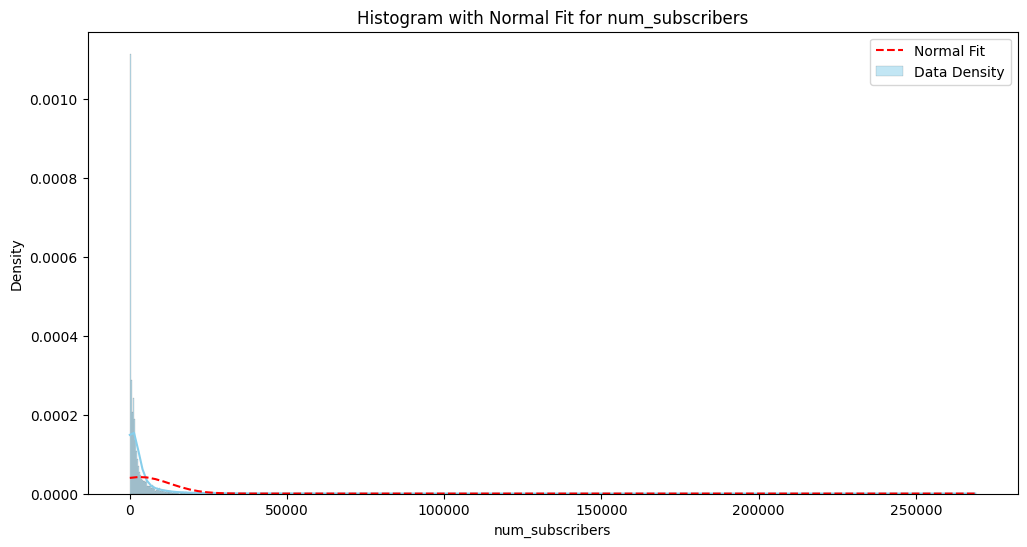

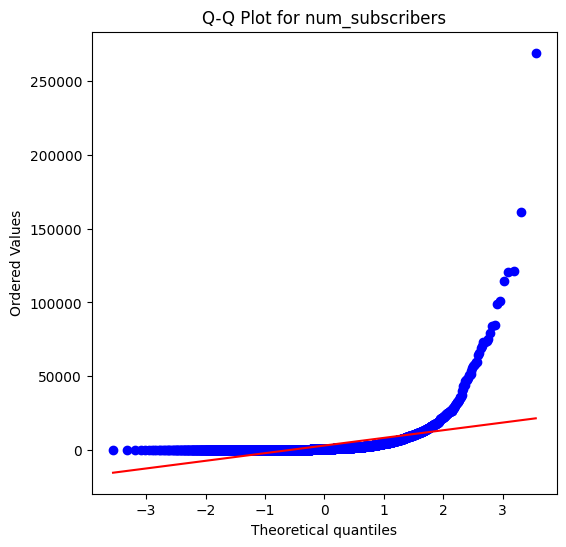

Shapiro-Wilk Test for num_subscribers: Statistic=0.2992, p-value=0.0000
num_subscribers does NOT follow a normal distribution.

Analyzing num_reviews:


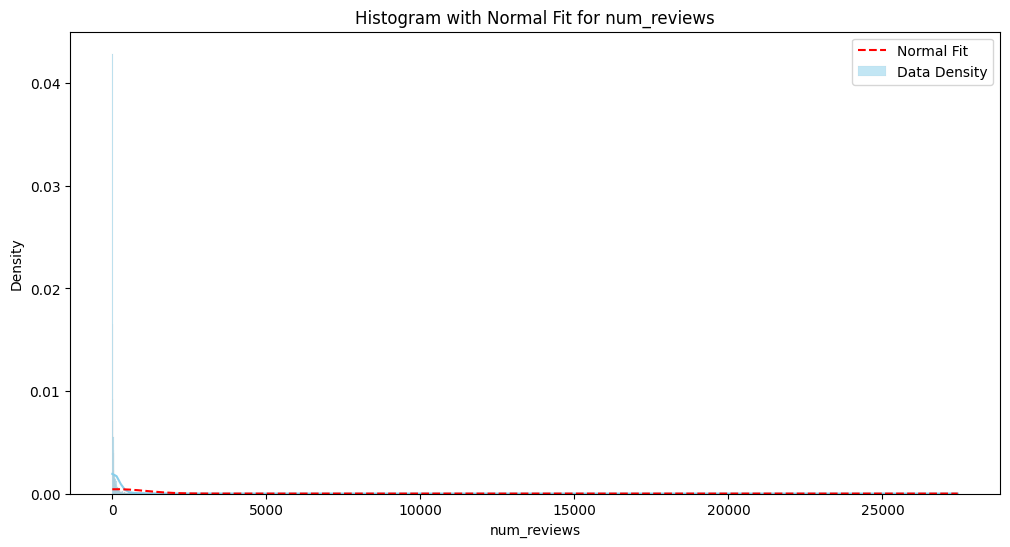

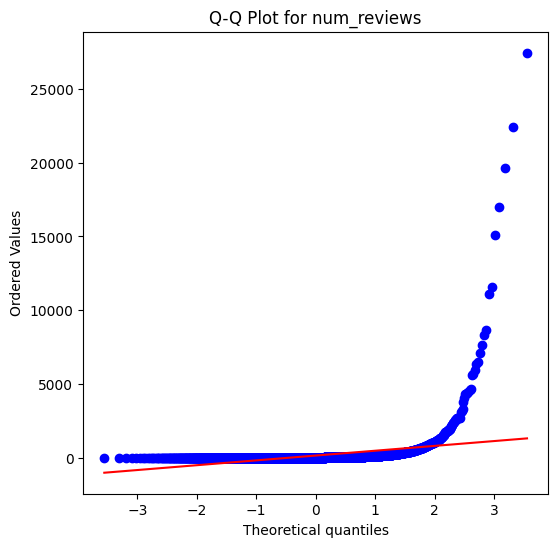

Shapiro-Wilk Test for num_reviews: Statistic=0.1234, p-value=0.0000
num_reviews does NOT follow a normal distribution.

Analyzing num_lectures:


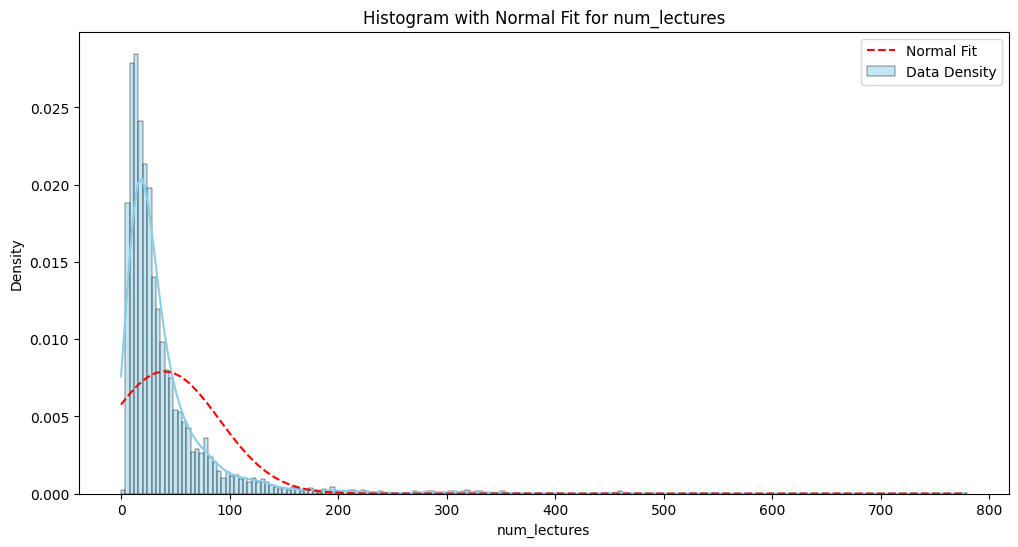

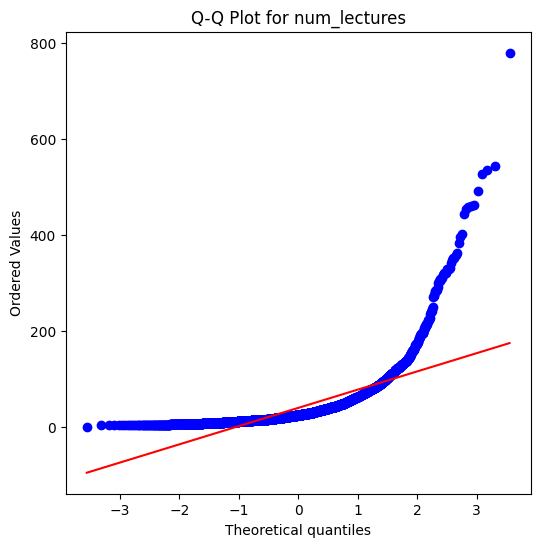

Shapiro-Wilk Test for num_lectures: Statistic=0.5661, p-value=0.0000
num_lectures does NOT follow a normal distribution.

Analyzing content_duration:


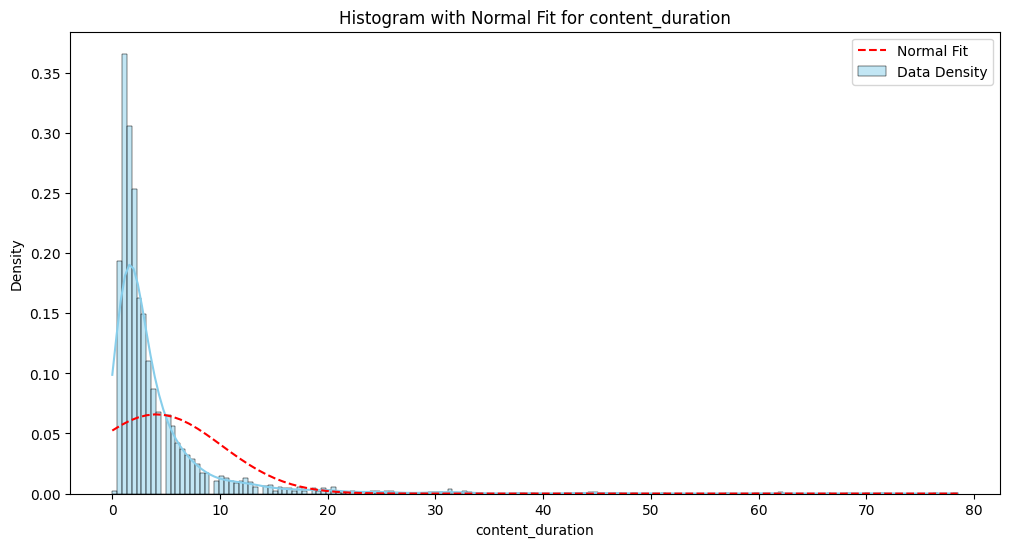

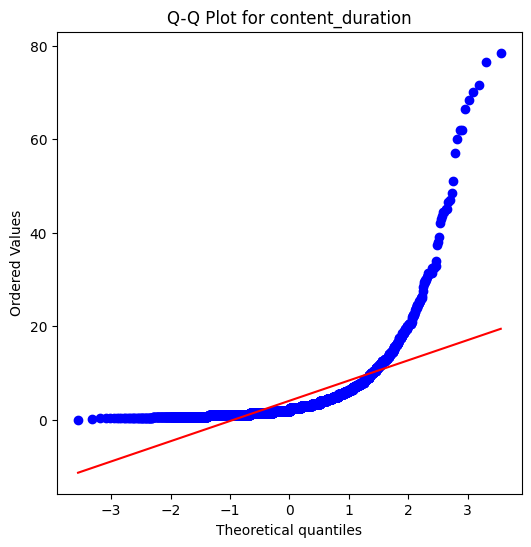

Shapiro-Wilk Test for content_duration: Statistic=0.5104, p-value=0.0000
content_duration does NOT follow a normal distribution.


In [50]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nAnalyzing {column}:")

    plt.figure(figsize=(12, 6))
    sns.histplot(df[column].dropna(), kde=True, stat="density", color="skyblue", label="Data Density")
 
    mean, std = norm.fit(df[column].dropna()) 
    x = np.linspace(df[column].min(), df[column].max(), 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'r--', label="Normal Fit")
    plt.title(f"Histogram with Normal Fit for {column}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    from scipy.stats import probplot
    probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.show()

    stat, p_value = shapiro(df[column].dropna())
    print(f"Shapiro-Wilk Test for {column}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    
    if p_value < 0.05:
        print(f"{column} does NOT follow a normal distribution.")
    else:
        print(f"{column} follows a normal distribution.")

THE PRICE EVOLUTION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")



Coefficients: [-2.62596928e-04  3.85041797e-03  2.86053281e-01  1.08257730e+00]
Intercept: 50.273652156488964
R-squared: 0.10227165031676777
